In [41]:
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
DATA_PATH = 'vcf/Matrix2.csv'

In [43]:
data = pd.read_csv(DATA_PATH, index_col=0) 

In [44]:
def filter_for_sparsity(data, cutoff=1): 
    sum_across_samples = jnp.sum(data.values, axis=1) 
    indices = jnp.where(sum_across_samples > cutoff)
    non_one = data.iloc[indices[0], :] 
    return non_one 

def filter_and_downsample(data, N=1000): 
    non_sparse_odorants = filter_for_sparsity(data)
    random_1000_odorants = non_sparse_odorants.sample(N, replace=False, random_state=0)
    non_zero_sample_indices = np.array(jnp.sum(random_1000_odorants.values, axis=0) > 0) 
    return random_1000_odorants.iloc[:, non_zero_sample_indices]

In [45]:
subsampled_data = filter_and_downsample(data)

In [47]:
subsampled_data.shape

(1000, 1295)

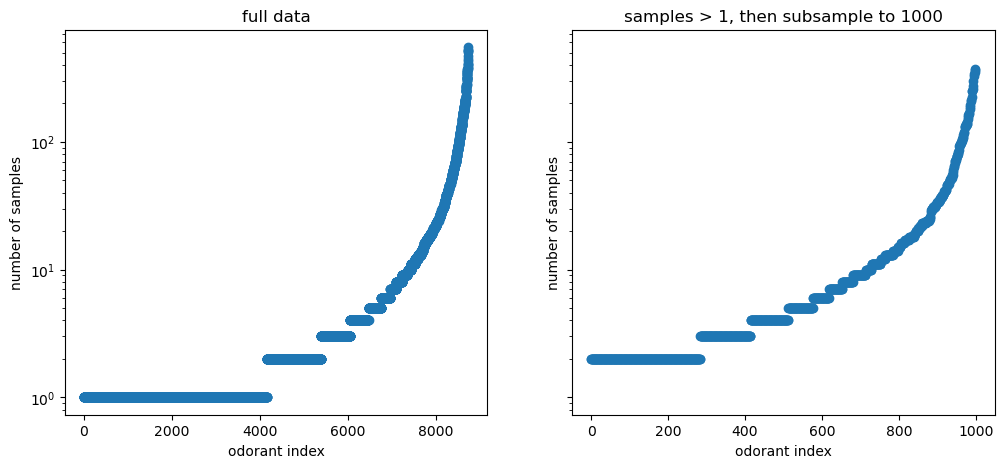

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_sums(data, ax):
    sums = jnp.sum(data.values, axis=1) 
    ax.scatter(range(len(sums)), jnp.sort(sums))
    ax.set_yscale('log') 
    ax.set_ylabel('number of samples') 
    ax.set_xlabel('odorant index') 
    return sums, ax

plot_sums(data, axs[0]) 
plot_sums(subsampled_data, axs[1]); 
axs[0].set_title('full data') 
axs[1].set_title('samples > 1, then subsample to 1000')
fig.savefig('tmp.png') 

In [55]:
subsampled_data.to_csv('Matrix2_filtered_and_downsampled_18March2025.csv')